#    2019102191 컴퓨터공학과 신주영 Term Project 제안서
#   주제 : 국내 공항의 날씨별, 노선별(국내/국제) 비행기 결항, 지연 정도 분석

# 목차
(1) 주제 선정 이유<br>
(2) 가설 정의<br>
(3) 인터넷을 통한 데이터의 획득<br>
(4) 분석을 위한 데이터의 가공<br>
(5) 분석 결과 도출<br>
(6) 결론<br>
(7) 참고 문헌<br>
(8) 별첨<br>

#    (1) 주제 선정 이유

1)비행기 기다리는 시간도 바쁜 현대인들이 효율적으로 시간관리를 하게끔 도와주기 위해서<br>
2)특정 공항이나 날씨에서의 비행기 결항이 나만 겪었던 것이 아님을 깨닫게 하여 결항으로 인한 짜증을 덜기 위해서<br>
3)날씨별, 노선별(국내/국제)로 비행기의 연착 정도가 많이 차이날 것이라고 판단되기 때문<br>
4)탑승 게이트, 운행하는 기체의 종류 따위로는 연착 정도가 많이 차이나지 않을 것이라고 판단되기 때문<br>

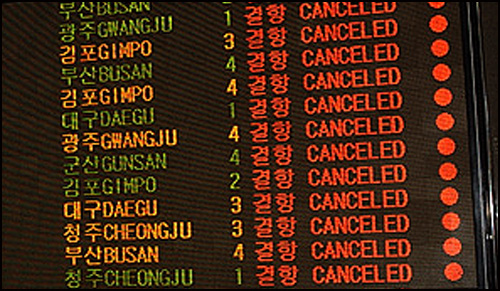

In [5]:
from IPython.display import Image
Image("airplane_canceled.jpg")

# (2) 가설 정의

# 1) 사전지식
 - CJJ : 청주공항<br>
 - CJU : 제주공항<br>
 - GMP : 김포공항<br>
 - HIN : 진주사천공항<br>
 - KPO : 포항공항<br>
 - KUV : 군산공항<br>
 - KWJ : 광주공항<br>
 - MWX : 무안공항<br>
 - PUS : 김해공항<br>
 - RSU : 여수공항<br>
 - TAE : 대구공항<br>
 - USN : 울산공항<br>
 - WJU : 원주공항<br>
 - YNY : 양양공항<br>

# 2) 가설
- 본인은 Term Project를 통해서 날씨가 좋지 않을 수록, 공항의 평점이 낮을 수록 연착 정도가 클 것이라고 추측했다.<br>
- 날씨가 좋지 않을 수록 연착 정도가 길 것이라 가설을 설정한 이유: 하늘을 나는 기체는 날씨의 영향을 많이 받으며, 날씨가 좋지 않을 수록 비행에 악영향을 받기 때문이다.<br>
- 공항의 평점이 낮을 수록 연착 정도가 길 것이라 가설을 설정한 이유: 탑승객들은 비행기가 연착될수록 짜증이 나고 기분이 나쁘며 이를 바탕으로 공항의 평점이 낮을 수록 연착 정도가 길 것이라 추측했다.<br>

# 3) 예상되는 데이터의 형태

- 공항별로 bargraph를 개별로 만들어 날씨지연, 점속지연 등의 데이터를 표현할 것이다.
- pivot_table을 통해 수집한 모든 데이터를 시각적으로 표현할 것이다.

# (3) 인터넷을 통한 데이터 획득

1) Link<br>
- 한국공항공사 공항별 기상원인별 결항 : https://www.data.go.kr/dataset/15002615/fileData.do<br>
- 한국공항공사 공항별 운항실적 : https://www.data.go.kr/dataset/15002627/fileData.do

2) 활용 방법<br>
- 한국공항공사의 공항별 운항실적을 이용해 이착륙한 기체의 갯수를 세린 후 결항현황을 퍼센트로 계산한다.<br>

# (4) 분석을 위한 데이터의 가공

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

데이터의 가공과 시각화를 위하여 matplotlib, pandas, seaborn 패키지를 import하였다. matplotlib는 bargraph를 그리는데, pandas와 seaborn은 pivot_table을 그리는데 이용하였다.

In [4]:
def read_dwData(): #비행기 지연 데이터 읽는 함수
    file = open("delayed.csv", 'r')
    weatherDelay = file.readlines()
    for i in range(len(weatherDelay)):
        weatherDelay[i] = weatherDelay[i].replace('\n', '').split(',')
    #data = pd.read_csv('delayed.csv')
    file.close()
    return weatherDelay

In [5]:
def read_cwData(): #비행기 결항 데이터 읽는 함수
    file = open("canceled.csv", 'r')
    weatherCanceled = file.readlines()
    for i in range(len(weatherCanceled)):
        weatherCanceled[i] = weatherCanceled[i].replace('\n', '').split(',')
    file.close()
    return weatherCanceled

pandas패키지의 read()함수를 이용하지 않고 파이썬 내장함수를 이용하여 파일을 읽었다. pandas의 dataframe이 어떤식으로 구성되어있는지 확인하기 위함이다.

In [6]:
def whichData(): #어느 공항, 노선의 데이터를 출력할 것인지 받을 함수
    airport = str(input('공항명 : '))
    airline = str(input('노선 : '))

    airport = airport.upper()
    airline = airline.upper()

    if(airline == 'D'):
        if(airport == 'CJJ'):
            return 0
        elif(airport == 'CJU'):
            return 2
        elif(airport == 'GMP'):
            return 4
        elif(airport == 'HIN'):
            return 6
        elif(airport == 'KPO'):
            return 7
        elif(airport == 'KUV'):
            return 8
        elif(airport == 'KWJ'):
            return 9
        elif(airport == 'MWX'):
            return 10
        elif(airport == 'PUS'):
            return 12
        elif(airport == 'RSU'):
            return 14
        elif(airport == 'TAE'):
            return 15
        elif(airport == 'USN'):
            return 17
        elif(airport == 'WJU'):
            return 18
        elif(airport == 'YNY'):
            return 19
        else:
            return 100
    elif(airline == 'I'):
        if(airport == 'CJJ'):
            return 1
        elif(airport == 'CJU'):
            return 3
        elif(airport == 'GMP'):
            return 5
        elif(airport == 'MWX'):
            return 11
        elif(airport == 'PUS'):
            return 13
        elif(airport == 'TAE'):
            return 16
        elif(airport == 'YNY'):
            return 20
        else:
            return 100
    else:
        return 100

사용자가 필요로 하는 공항의 정보를 출력하기 위해 공항명과 노선을 입력받고 이에 대응하는 숫자를 부여하였다.

In [7]:
def delNoMeanData(delayRecord, CanceledRecord): #모두 2016년의 데이터이므로 관련 열을 삭제하는 함수
    for i in range(len(delayRecord)):
        del(delayRecord[i][0])
    for i in range(len(CanceledRecord)):
        del(CanceledRecord[i][0])

얻은 데이터는 2016년도의 데이터밖에 없으므로 년도와 관련된 데이터는 의미가 없어서 삭제하였다.

In [8]:
def percentData(delayRecord, CanceledRecord): #주어진 데이터를 바탕으로 비율을 계산하는 함수
    percentMatrix = [['', 'CJJ, D', 'CJJ, I', 'CJU, D', 'CJU, I', 'GMP, D', 'GMP, I', 'HIN, D', 'KPO, D', 'KUV, D', 'KWJ, D', 
    'MWX, D', 'MWX, I', 'PUS, D', 'PUS, I', 'RSU, D', 'TAE, D', 'TAE, I', 'USN, D', 'WJU, D', 'YNY, D', 'YNY, I']]
    weatherDelayPercent = ['weather\nDelay']
    weatherCanceledPercent = ['weather\nCanceled']
    acessDelayPercent = ['access\nDelay']
    acessCanceledPercent = ['access\nCanceled']
    repairDelayPercent = ['repair\nDelay']
    repairCanceledPercent = ['repair\nCanceled']
    etcDelayPercent = ['etc\nDelay']
    etcCanceledPercent = ['etc\nCanceled']
    for i in range(1, len(delayRecord)):
        if(delayRecord[i][9] == '0'):
            weatherDelayPercent.append(0.0)
        else:
            weatherDelayPercent.append(round(int(delayRecord[i][3])/int(delayRecord[i][9])*100, 2))
    for i in range(1, len(CanceledRecord)):
        if(CanceledRecord[i][2] == '0'):
            weatherCanceledPercent.append(0.0)
        else:
            weatherCanceledPercent.append(round(int(CanceledRecord[i][4])/int(CanceledRecord[i][2])*100, 2))
    for i in range(1, len(delayRecord)):
        if(delayRecord[i][9] == '0'):
            acessDelayPercent.append(0.0)
        else:
            acessDelayPercent.append(round(int(delayRecord[i][4])/int(delayRecord[i][9])*100, 2))
    for i in range(1, len(CanceledRecord)):
        if(CanceledRecord[i][2] == '0'):
            acessCanceledPercent.append(0.0)
        else:
            acessCanceledPercent.append(round(int(CanceledRecord[i][4])/int(CanceledRecord[i][2])*100, 2))
    for i in range(1, len(delayRecord)):
        if(delayRecord[i][9] == '0'):
            repairDelayPercent.append(0.0)
        else:
            repairDelayPercent.append(round(int(delayRecord[i][5])/int(delayRecord[i][9])*100, 2))
    for i in range(1, len(CanceledRecord)):
        if(CanceledRecord[i][2] == '0'):
            repairCanceledPercent.append(0.0)
        else:
            repairCanceledPercent.append(round(int(CanceledRecord[i][4])/int(CanceledRecord[i][2])*100, 2))
    for i in range(1, len(delayRecord)):
        if(delayRecord[i][9] == '0'):
            etcDelayPercent.append(0.0)
        else:
            etcDelayPercent.append(round(int(delayRecord[i][5])/int(delayRecord[i][9])*100, 2))
    for i in range(1, len(CanceledRecord)):
        if(CanceledRecord[i][2] == '0'):
            etcCanceledPercent.append(0.0)
        else:
            etcCanceledPercent.append(round(int(CanceledRecord[i][4])/int(CanceledRecord[i][2])*100, 2))
    percentMatrix.append(weatherDelayPercent)
    percentMatrix.append(weatherCanceledPercent)
    percentMatrix.append(acessDelayPercent)
    percentMatrix.append(acessCanceledPercent)
    percentMatrix.append(repairDelayPercent)
    percentMatrix.append(etcDelayPercent)
    percentMatrix.append(etcCanceledPercent)
    percentMatrix = transMat(percentMatrix)
    return percentMatrix

각 공항마다 이륙한 기체의 대수가 다르므로 비율(%)을 계산하였다. 또, 공항별로, 지연 혹은 결항의 원인별로 데이터를 구분하였으며 dataframe을 제작하기 위해 index와 column으로 쓰일 행, 열도 제작하였다.

In [9]:
def transMat(originalMat): #전치행렬을 만드는 함수
    transedMat = []
    onlyMat = []
    for i in range(len(originalMat[0])):
        for j in range(len(originalMat)):
            onlyMat.append(originalMat[j][i])
        transedMat.append(onlyMat)
        onlyMat = []
    return transedMat

편하게 데이터를 가공하기 위해 전치행렬을 만드는 함수를 따로 제작하였다.

In [10]:
def onlybarVisual(mat, portNum): #matplotlib을 이용하여 bargraph를 그리는 함수
    if(portNum != 100):
        funcMat = []
        for i in range(len(mat)):
            onlyMat = []
            for j in range(len(mat[0])):
                onlyMat.append(mat[i][j])
            funcMat.append(onlyMat)
        for i in range(len(funcMat)):
            funcMat[i].remove(funcMat[i][0])
        plt.bar(funcMat[0], funcMat[portNum+1], label='')
        plt.xlabel('')
        plt.ylabel('')
        plt.title(mat[portNum+1][0])
        plt.show()

matplotlib을 이용하여 bargraph를 그리는 함수이다. 사용자가 원하는 공항과 노선의 날씨 지연, 날씨결항, 점속지연, 점속결항, 수리지연, 기타지연, 기타결항의 비율을 출력한다.

In [11]:
def tableVisual(mat): #pandas와 seaborn를 이용하여 pivotchart를 그리는 함수
    funcMat = []
    for i in range(len(mat)):
        onlyMat = []
        for j in range(len(mat[0])):
            onlyMat.append(mat[i][j])
        funcMat.append(onlyMat)
    noIndex = []
    for i in range(len(funcMat)):
        onlyMat = []
        for j in range(len(funcMat[0])):
            onlyMat.append(funcMat[i][j])
        noIndex.append(onlyMat)
    for i in range(len(funcMat)):
        noIndex[i].remove(noIndex[i][0])
    dictdata = {}
    for i in range(1, len(funcMat)):
        dictdata.update({funcMat[i][0]:noIndex[i]})
    col = []
    index = funcMat[0]
    index.remove(index[0])
    for i in range(1, len(funcMat)):
        col.append(funcMat[i][0])
    df = pd.DataFrame(dictdata, index=index, columns=col)
    df = df.T
    plt.figure(figsize=(8, 8))
    sns.heatmap(df)
    plt.show()

pandas와 seaborn을 이용하여 pivotchart를 그리는 함수이다. dataframe을 제작하기 위해 함수내의 리스트를 수정하면 같은 주소를 공유하는 모든 리스트가 수정되므로 함수 내에서만 이용할 funcMat리스트를 만들었다. index에 대응하는 데이터는 index가 포함되면 안되므로 index가 없는 배열을 만들었다. index인 funcMat[i][0]와 noIndex[i]를 대응시켜 dictionary를 만들었다. 제작된 dictionary를 바탕으로 pandas패키지를 이용해 dataframe을 제작한 후 이를 가공하기위해 전치시켰다. 마지막으로, 완성된 dataframe을 seaborn패키지의 heatmap()함수를 이용하여 출력하였다.

In [12]:
delayRecord = read_dwData()
CanceledRecord = read_cwData()
delNoMeanData(delayRecord, CanceledRecord)
percent = percentData(delayRecord, CanceledRecord)

# (5) 분석 결과 도출

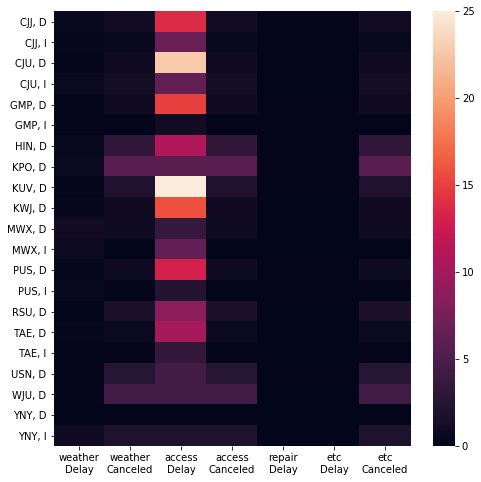

In [14]:
tableVisual(percent)

공항명 : CJJ
노선 : D


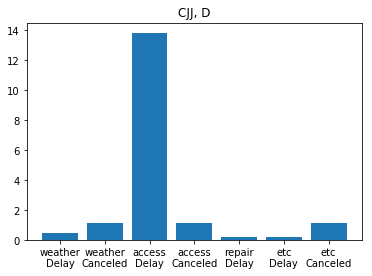

In [15]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : CJJ
노선 : I


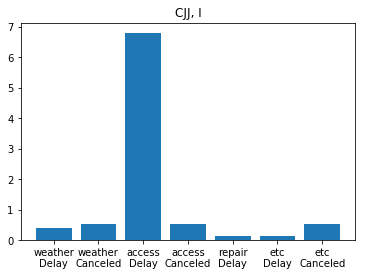

In [16]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : CJU
노선 : D


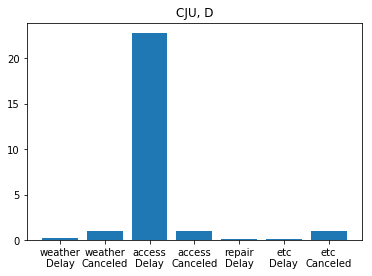

In [17]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : CJU
노선 : I


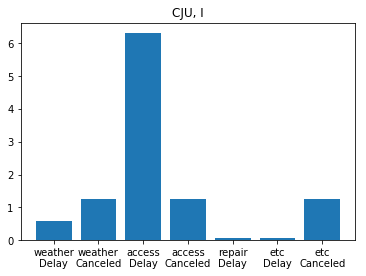

In [18]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : GMP
노선 : D


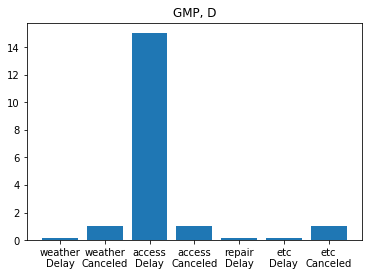

In [19]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : GMP
노선 : I


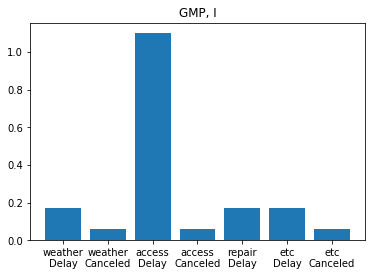

In [20]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : HIN
노선 : D


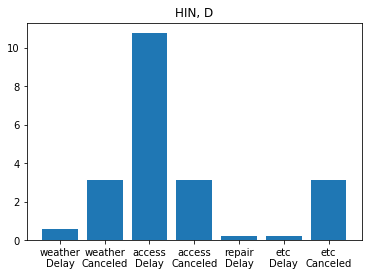

In [21]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : KPO
노선 : D


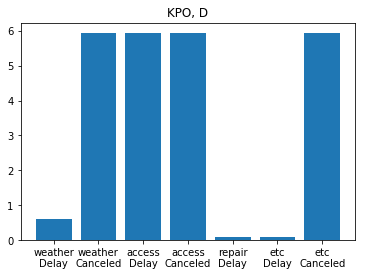

In [22]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : KUV
노선 : D


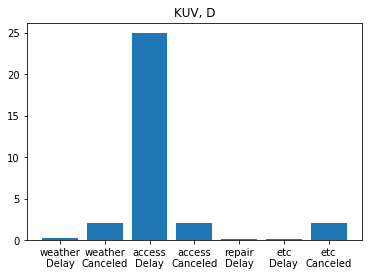

In [25]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : KWJ
노선 : D


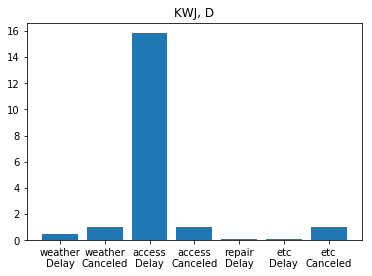

In [24]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : MWX
노선 : D


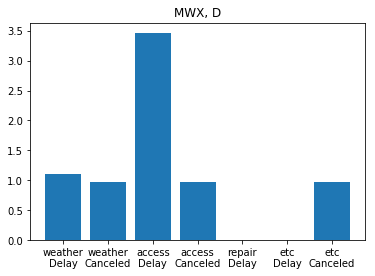

In [26]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : MWX
노선 : I


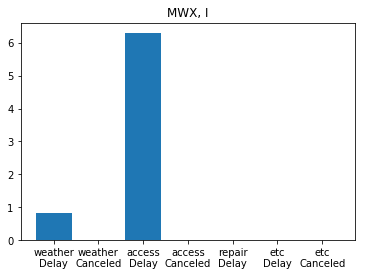

In [27]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : PUS
노선 : D


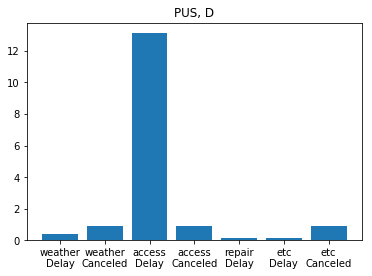

In [28]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : PUS
노선 : I


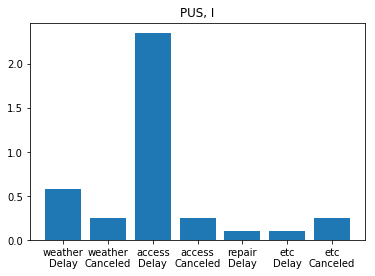

In [29]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : RSU
노선 : D


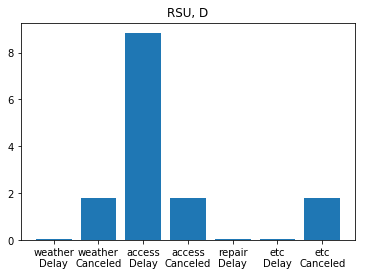

In [30]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : TAE
노선 : D


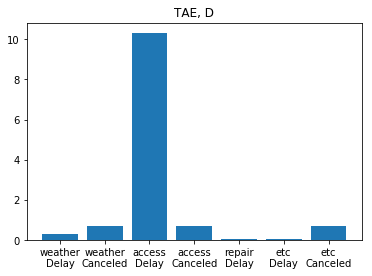

In [31]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : TAE
노선 : I


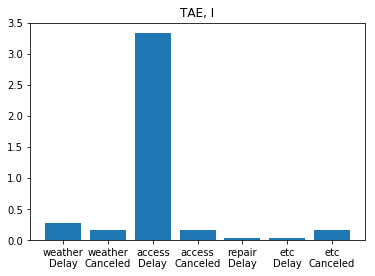

In [32]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : USN
노선 : D


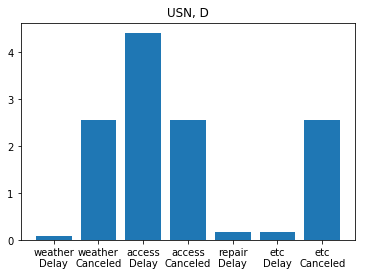

In [33]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : WJU
노선 : D


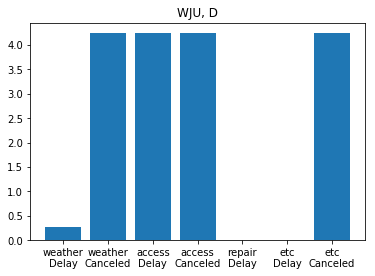

In [34]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : YNY
노선 : D


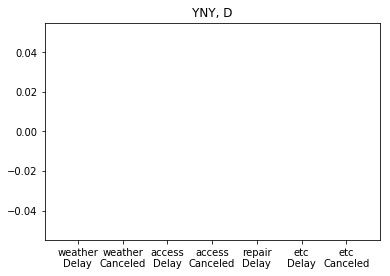

In [35]:
portNum = whichData()
onlybarVisual(percent, portNum)

공항명 : YNY
노선 : I


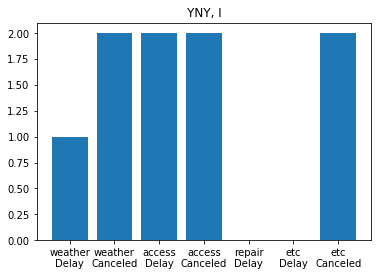

In [36]:
portNum = whichData()
onlybarVisual(percent, portNum)

# (6) 결론

1) 공항의 종류를 불문하고 접속지연이 가장 높은 비율을 나타냈다.<br>
2) 날씨 지연과 접속 지연이 비슷한 비율을 나타내었다.<br>
3) 기상 상황과 날씨 지연의 관계를 나타내고 싶었으나, 어느 때에 기체가 지연되었는지 파악하지 못하였다.<br>
4) 공항의 평점 데이터를 크롤링하지 못하였으나, 추후 연구로 공항의 평점 데이터를 크롤링하여 평점과 지연 및 결항의 관계를 파악하는 것도 좋아 보인다.<br>

# (7) 참고문헌

1) 파이썬을 이용한 데이터 시각화 : https://blog.naver.com/vangarang/221132615760<br>
2) Pandas library 설치 : https://blog.naver.com/nilsine11202/221226012519<br>
3) pandas : https://pandas.pydata.org/<br>
4) matplotlib : https://matplotlib.org/<br>
3) seaborn : http://seaborn.pydata.org/<br>
5) Do it! 점프 투 파이썬, 박응용 저<br>

# (8) 별첨

delayed_by_weather.csv

# (9) 별첨

canceled_by_weather.csv